In [38]:
import matplotlib.pyplot as plt
import inspect
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import tensorflow as tf

sns.set()
tf.enable_eager_execution()

Epoch 1/20
531/531 [==============================] - 1s 1ms/sample - loss: 0.1828 - acc: 0.9190
Epoch 2/20
531/531 [==============================] - 0s 642us/sample - loss: 0.0651 - acc: 0.9831
Epoch 3/20
531/531 [==============================] - 0s 634us/sample - loss: 0.0429 - acc: 0.9906
Epoch 4/20
531/531 [==============================] - 0s 563us/sample - loss: 0.0317 - acc: 0.9962
Epoch 5/20
531/531 [==============================] - 0s 562us/sample - loss: 0.0262 - acc: 0.9981
Epoch 6/20
531/531 [==============================] - 0s 562us/sample - loss: 0.0271 - acc: 0.9962
Epoch 7/20
531/531 [==============================] - 0s 586us/sample - loss: 0.0202 - acc: 0.9962
Epoch 8/20
531/531 [==============================] - 0s 561us/sample - loss: 0.0191 - acc: 0.9944
Epoch 9/20
531/531 [==============================] - 0s 560us/sample - loss: 0.0203 - acc: 0.9962
Epoch 10/20
531/531 [==============================] - 0s 547us/sample - loss: 0.0144 - acc: 1.0000
Epoch 11/20

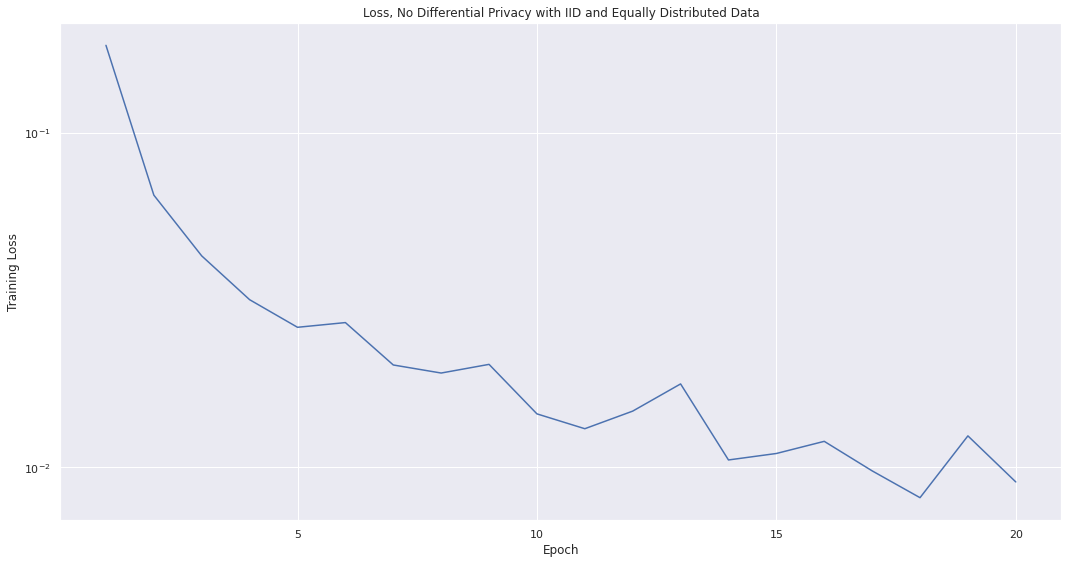

In [39]:
# Splits the data in an iid format
__file__ = inspect.getfile(lambda: None)
data_dir = os.path.abspath(os.path.dirname(__file__))

with open(f'{data_dir}/BC-TCGA-Normal.txt') as f:
    normal_df = pd.read_csv(f, sep='\t', index_col=0)
    normal_df = normal_df.fillna(normal_df.mean())
    normal_df = normal_df.transpose()
    normal_df = normal_df.sample(frac=1)
    normal_test_df = normal_df.iloc[:6, :]
    normal_df_1 = normal_df.iloc[6:, :]

with open(f'{data_dir}/BC-TCGA-Tumor.txt') as f:
    tumor_df = pd.read_csv(f, sep='\t', index_col=0)
    tumor_df = tumor_df.fillna(tumor_df.mean())
    tumor_df = tumor_df.transpose()
    tumor_df = tumor_df.sample(frac=1)
    tumor_test_df = tumor_df.iloc[:53, :]
    tumor_df_1 = tumor_df.iloc[53:, :]

normal_train = normal_df_1.to_numpy()
y_normal_train = np.array([0] * normal_train.shape[0])
normal_test = normal_test_df.to_numpy()
y_normal_test = np.array([0] * normal_test.shape[0])

tumor_train = tumor_df_1.to_numpy()
y_tumor_train = np.array([1] * tumor_train.shape[0])
tumor_test = tumor_test_df.to_numpy()
y_tumor_test = np.array([1] * tumor_test.shape[0])

train = np.concatenate((normal_train, tumor_train), axis = 0)
y_train = np.concatenate((y_normal_train, y_tumor_train))
test = np.concatenate((normal_test, tumor_test), axis = 0)
y_test = np.concatenate((y_normal_test, y_tumor_test))

vanilla_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = 17814), 
    tf.keras.layers.Dropout(0.2, input_shape=(17814,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

vanilla_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5E-4), loss='binary_crossentropy', metrics=['accuracy'])
history = vanilla_model.fit(x = train, y = y_train, epochs = 20, batch_size=16)

plt.figure(figsize=(15, 8))
plt.plot(list(range(1, len(history.history['loss']) + 1)), history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.xticks([5, 10, 15, 20])
plt.title(r'Loss, No Differential Privacy with IID and Equally Distributed Data')
plt.yscale('log')
plt.tight_layout()
plt.savefig('epsInfloss.png', dpi = 500)
plt.savefig('epsInfloss.svg')

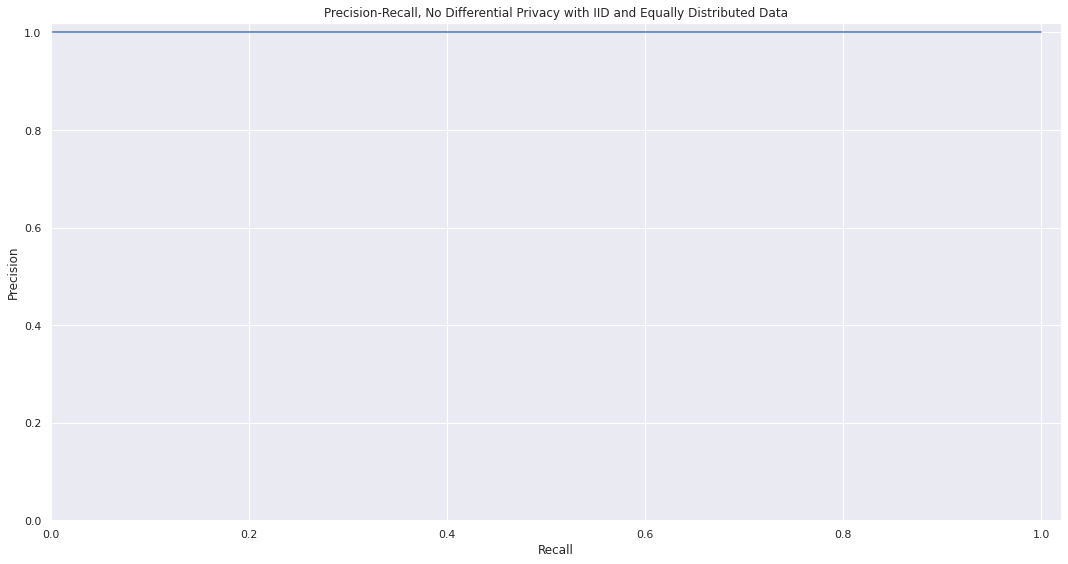

In [40]:
preds = vanilla_model.predict(test)
y_test = np.reshape(y_test, (-1, 1))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds)


plt.figure(figsize=(15, 8))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim((0, 1.02))
plt.ylim((0, 1.02))
plt.title(r'Precision-Recall, No Differential Privacy with IID and Equally Distributed Data')
plt.tight_layout()
plt.savefig('epsInfpr.png', dpi = 500)
plt.savefig('epsInfpr.svg')

In [16]:
accuracy = []

for i in range(0, 40):
    # Splits the data in an iid format
    __file__ = inspect.getfile(lambda: None)
    data_dir = os.path.abspath(os.path.dirname(__file__))

    with open(f'{data_dir}/BC-TCGA-Normal.txt') as f:
        normal_df = pd.read_csv(f, sep='\t', index_col=0)
        normal_df = normal_df.fillna(normal_df.mean())
        normal_df = normal_df.transpose()
        normal_df = normal_df.sample(frac=1)
        normal_test_df = normal_df.iloc[:6, :]
        normal_df_1 = normal_df.iloc[6:, :]

    with open(f'{data_dir}/BC-TCGA-Tumor.txt') as f:
        tumor_df = pd.read_csv(f, sep='\t', index_col=0)
        tumor_df = tumor_df.fillna(tumor_df.mean())
        tumor_df = tumor_df.transpose()
        tumor_df = tumor_df.sample(frac=1)
        tumor_test_df = tumor_df.iloc[:53, :]
        tumor_df_1 = tumor_df.iloc[53:, :]

    normal_train = normal_df_1.to_numpy()
    y_normal_train = np.array([0] * normal_train.shape[0])
    normal_test = normal_test_df.to_numpy()
    y_normal_test = np.array([0] * normal_test.shape[0])

    tumor_train = tumor_df_1.to_numpy()
    y_tumor_train = np.array([1] * tumor_train.shape[0])
    tumor_test = tumor_test_df.to_numpy()
    y_tumor_test = np.array([1] * tumor_test.shape[0])

    train = np.concatenate((normal_train, tumor_train), axis = 0)
    y_train = np.concatenate((y_normal_train, y_tumor_train))
    test = np.concatenate((normal_test, tumor_test), axis = 0)
    y_test = np.concatenate((y_normal_test, y_tumor_test))

    vanilla_model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape = 17814), 
        tf.keras.layers.Dropout(0.2, input_shape=(17814,)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    vanilla_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5E-4), loss='binary_crossentropy', metrics=['accuracy'])
    vanilla_model.fit(x = train, y = y_train, epochs = 20, batch_size=16)
    accuracy.append(vanilla_model.evaluate(x = test, y = y_test)[1])

Epoch 1/20
531/531 [==============================] - 1s 1ms/sample - loss: 0.2393 - acc: 0.8983
Epoch 2/20
531/531 [==============================] - 0s 614us/sample - loss: 0.1339 - acc: 0.9284
Epoch 3/20
531/531 [==============================] - 0s 597us/sample - loss: 0.0597 - acc: 0.9831
Epoch 4/20
531/531 [==============================] - 0s 597us/sample - loss: 0.0388 - acc: 0.9868
Epoch 5/20
531/531 [==============================] - 0s 779us/sample - loss: 0.0289 - acc: 0.9925
Epoch 6/20
531/531 [==============================] - 0s 571us/sample - loss: 0.0302 - acc: 0.9925
Epoch 7/20
531/531 [==============================] - 0s 584us/sample - loss: 0.0211 - acc: 0.9925
Epoch 8/20
531/531 [==============================] - 0s 589us/sample - loss: 0.0163 - acc: 0.9944
Epoch 9/20
531/531 [==============================] - 0s 600us/sample - loss: 0.0206 - acc: 0.9944
Epoch 10/20
531/531 [==============================] - 0s 585us/sample - loss: 0.0160 - acc: 0.9944
Epoch 11/20

In [17]:
print(accuracy)

[1.0, 1.0, 0.9830508, 1.0, 1.0, 0.9830508, 1.0, 1.0, 1.0, 0.9661017, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9830508, 1.0, 0.9830508, 0.9830508, 0.9830508, 0.9830508, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
